# New York City AirBnB Kaggle Dataset

<b>Context</b>: Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. Airbnb is an online marketplace that connects people who want to rent out their homes (Hosts) with people who are looking for accommodations (Travellers) in that locale. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. So today, we would like to dive into a NYC Airbnb dataset to discover underlying relationships in the area

<b>Column Information</b>: 
- id (listing ID)
- name (name of the listing)
- host_id (host ID)
- host_name (name of the host)
- neighbourhood_group (location)
- neighbourhood (area)
- latitude (latitude coordinates)
- longitude (longitude coordinates)
- room_type (listing space type)
- price (price in dollars per night)
- minimum_nights (amount of nights minimum)
- number_of_reviews (number of reviews)
- last_review (latest review done by a client)
- reviews_per_month (number of reviews per month of that listing)
- calculated_host_listings_count (amount of listing per host)
- availability_365 (number of days when listing is available for booking)

<b>Buisiness Objective</b>

What are we trying to predict with the dataset for airbnb?
- We are trying to create an optimized machine learning model to predict the price of NYC Airbnb's listing 
- Examining how features such as Host ID, Neighboorhood, Room Type, etc varies with the price 

How will the price prediction model help?
   - In terms of hosts, building a accurate price predictor reflective of the geolocation, area, and credibility of the host, will help them gain a sense of how they should price their listings in response to their rental unit's attributes. May allow them to gain insights of which area/suburb they can lease for booking and maximise their profits through the pricing predictor 
   - As for Airbnb, it can accurately depict the price distribution across the NYC neighbourhood which accounts the popularity of the hosts, room_types and location, and also determine areas with higher amounts of listings. This would allow the company to gain insights to promote certain areas that has lower popularity

![Image of AirBnB](https://img4.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg)

## 1. Data Collection

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import folium
import folium.plugins
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import ValidationCurve
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.shape # 48,895 Rows, 16 Columns

(48895, 16)

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.last_review = pd.to_datetime(df.last_review,infer_datetime_format=True)

In [6]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

- Price: Mean - 152.72, STD - 240.15 compared to other features, max price - 10000

In [7]:
df[df.price == df.price.max()] # Most expensive Airbnb listings

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238                NaN                               1                83

## 2. Exploratory Data Analysis

<b>Price Distribution</b>

Text(0.5, 0, 'log(1+price)')

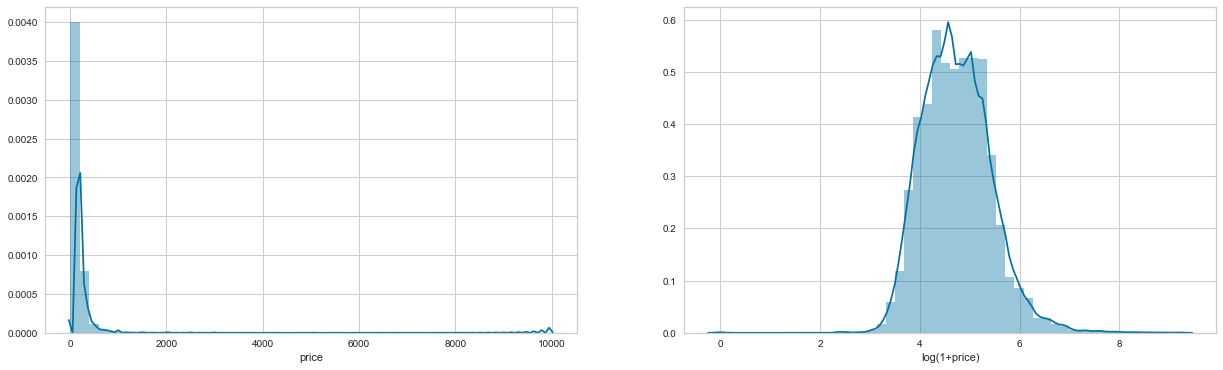

In [8]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
# Can see that the price model has outliers, high STD and a skewed distribution and needs to be standardized with log to be ready for training

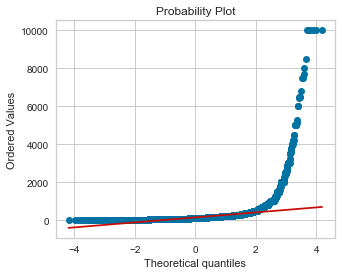

In [9]:
# This QQ Normality Plot is a test that shows if the distribution of price is normalized BEFORE logging price as the red line is a perfect normality
# If the distribution is non normal, it will deviate from the normalized reference curve
plt.figure(figsize=(5,4))
stats.probplot(df['price'], plot=plt)
plt.show()

In [10]:
# Confirms that we can proceed to log all price values
df['price'] = np.log1p(df['price'])

# We can also remove outliers by eliminating z-score of log price > 3 or < -3
std_dev = 3

df = df[np.abs(stats.zscore(df.price)) < float(std_dev)]

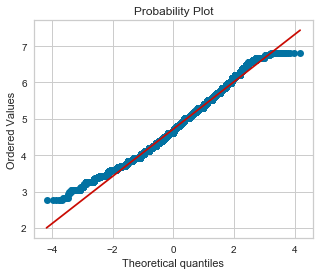

In [11]:
plt.figure(figsize=(5,4))
stats.probplot(df['price'], plot=plt)
plt.show()

In [12]:
# Existing rows after removal of outliers
df.shape

(48507, 16)

<b>Neighbourhood Group</b>

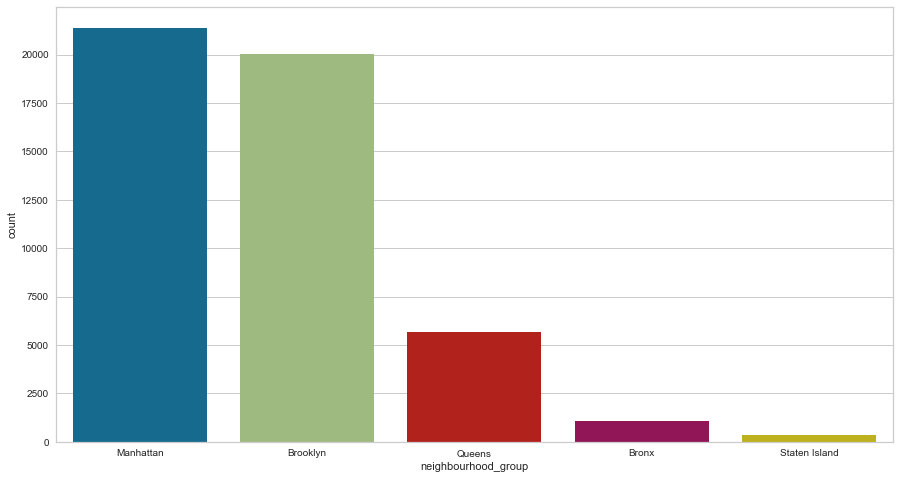

In [13]:
matplotlib.rcParams['figure.figsize'] = (15,8)
sns.countplot(data=df, x='neighbourhood_group',order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])

In [14]:
df.neighbourhood_group.value_counts()

Manhattan        21395
Brooklyn         20008
Queens            5648
Bronx             1087
Staten Island      369
Name: neighbourhood_group, dtype: int64

In [15]:
man_brook = df.neighbourhood_group.value_counts()[0]+df.neighbourhood_group.value_counts()[1]

In [16]:
total=[]
for i in df.neighbourhood_group.value_counts():
    total.append(i)

# Manhatten and Brooklyn contains 85.4% of the listings 
print('Total % of Listings Manhatten and Brooklyn Contains: ',(man_brook/sum(total))*100)

Total % of Listings Manhatten and Brooklyn Contains:  85.35469107551488


Text(0, 0.5, 'log price')

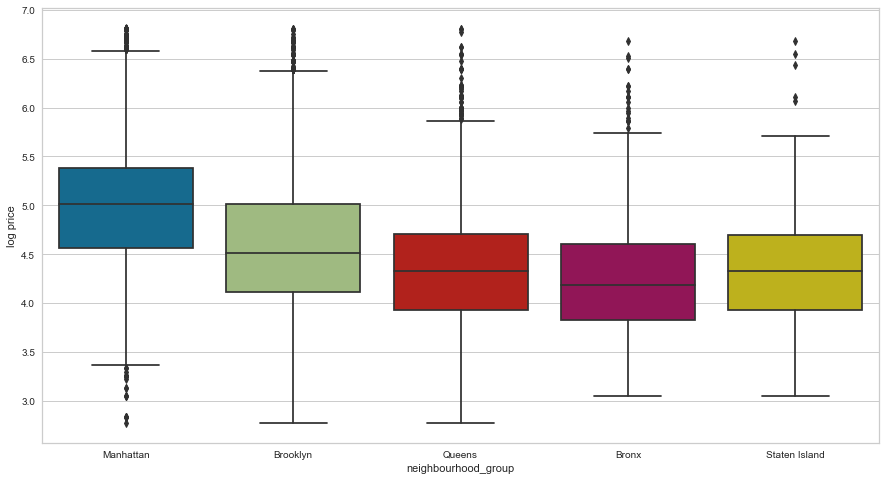

In [17]:
sns.boxplot(data=df, x='neighbourhood_group',y='price',order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.ylabel("log price")

<b>Neighbourhood</b>

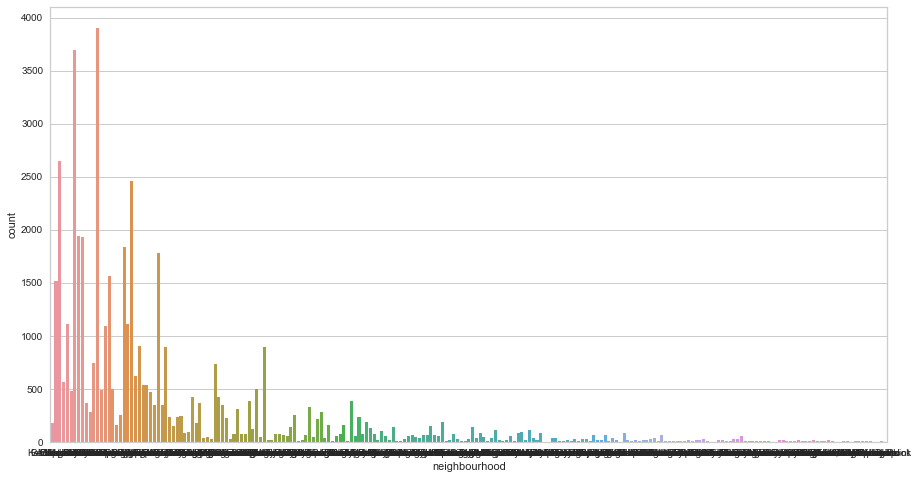

In [18]:
sns.countplot(data=df, x='neighbourhood')

In [19]:
df.neighbourhood.value_counts()

Williamsburg          3905
Bedford-Stuyvesant    3696
Harlem                2649
Bushwick              2457
Hell's Kitchen        1943
                      ... 
Rossville                1
New Dorp                 1
Woodrow                  1
Richmondtown             1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [20]:
len(df.neighbourhood.unique())
# The amount of unique values will be an issue with one hot encoding

221

<b>Room Type</b>

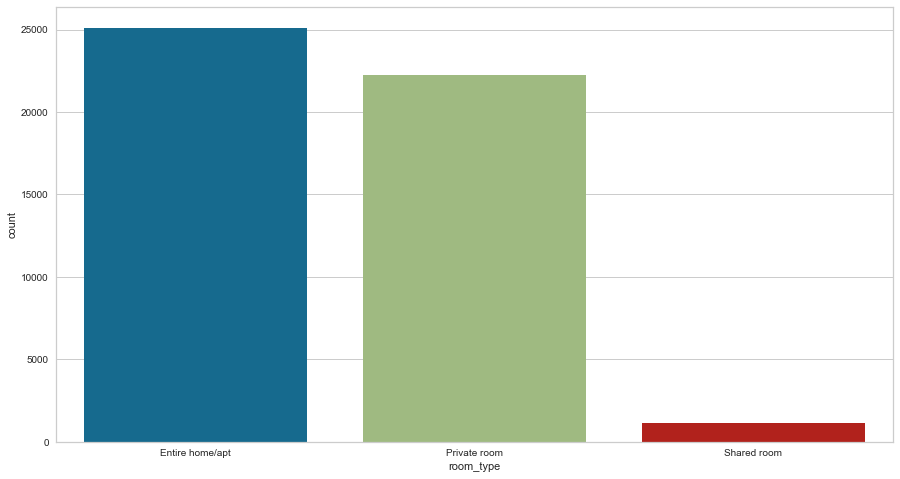

In [21]:
sns.countplot(data=df, x='room_type',order=['Entire home/apt', 'Private room', 'Shared room'])
# Shared Room listings are significantly lower than private room/entire home --> Makes sense as Airbnb has little listings that does room sharing

In [22]:
df.room_type.value_counts()

Entire home/apt    25118
Private room       22240
Shared room         1149
Name: room_type, dtype: int64

neighbourhood_group
Manhattan        21395
Brooklyn         20008
Queens            5648
Bronx             1087
Staten Island      369
Name: room_type, dtype: int64


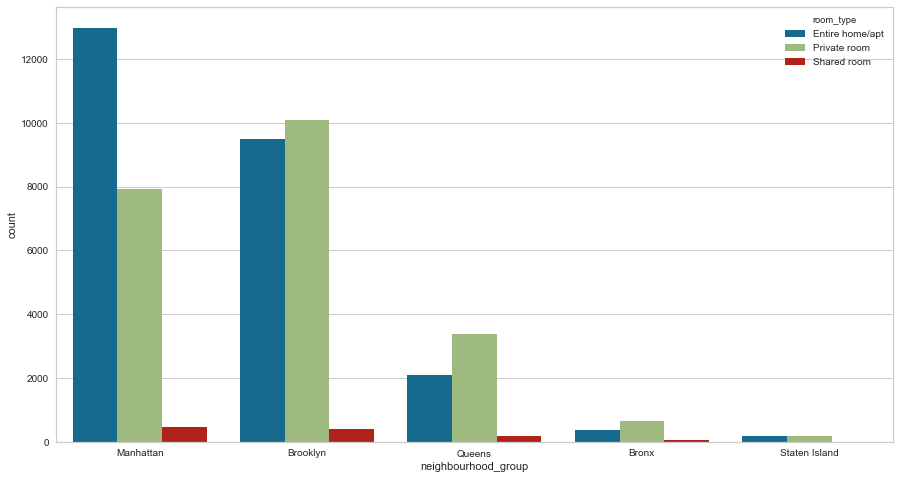

In [23]:
print(df.groupby('neighbourhood_group').room_type.count().sort_values(ascending=False))
sns.countplot(x='neighbourhood_group', data=df,\
              order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],\
              hue='room_type',\
              hue_order=['Entire home/apt', 'Private room', 'Shared room'])

Text(0, 0.5, 'log price')

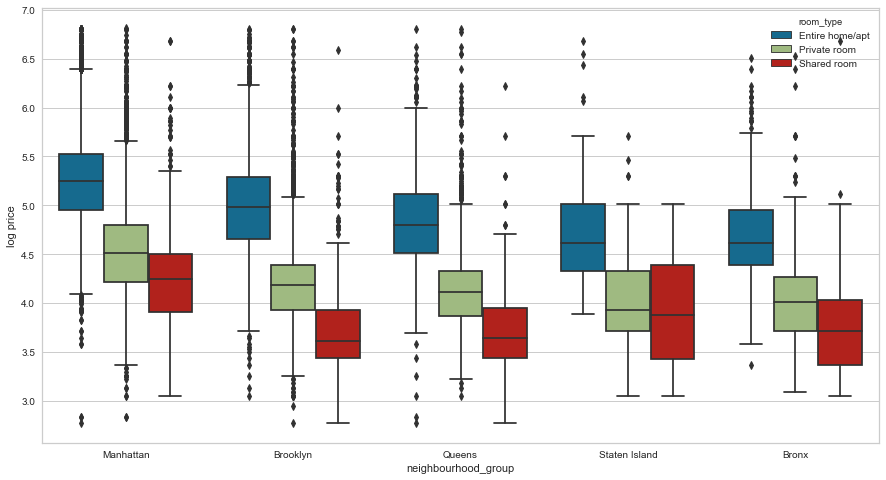

In [24]:
sns.boxplot(x='neighbourhood_group', y='price',\
            data=df, hue='room_type',\
            order=['Manhattan','Brooklyn','Queens','Staten Island','Bronx'],\
            hue_order=['Entire home/apt', 'Private room', 'Shared room'])
plt.ylabel("log price")

Text(0, 0.5, 'log price')

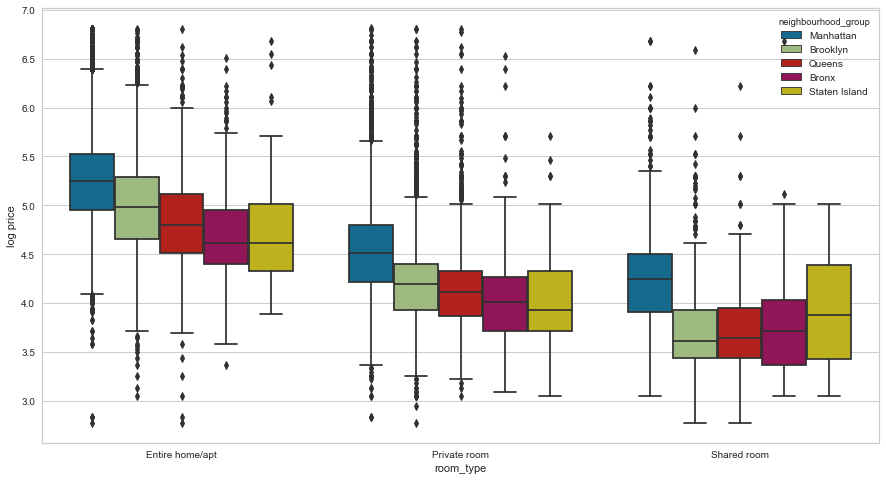

In [25]:
sns.boxplot(data=df, x='room_type',y='price',hue='neighbourhood_group',\
            order=['Entire home/apt', 'Private room', 'Shared room'],\
            hue_order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.ylabel("log price")

<b>Minimum Nights</b>

Text(0.5, 0, 'log(1+minimum_nights)')

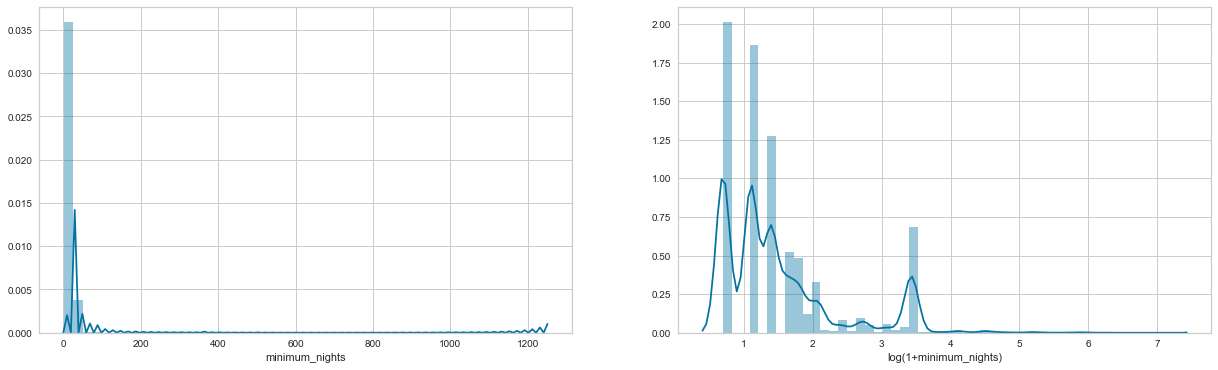

In [26]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['minimum_nights'], ax=axes[0])
sns.distplot(np.log1p(df['minimum_nights']), ax=axes[1])
axes[1].set_xlabel('log(1+minimum_nights)')

Text(0, 0.5, 'log price')

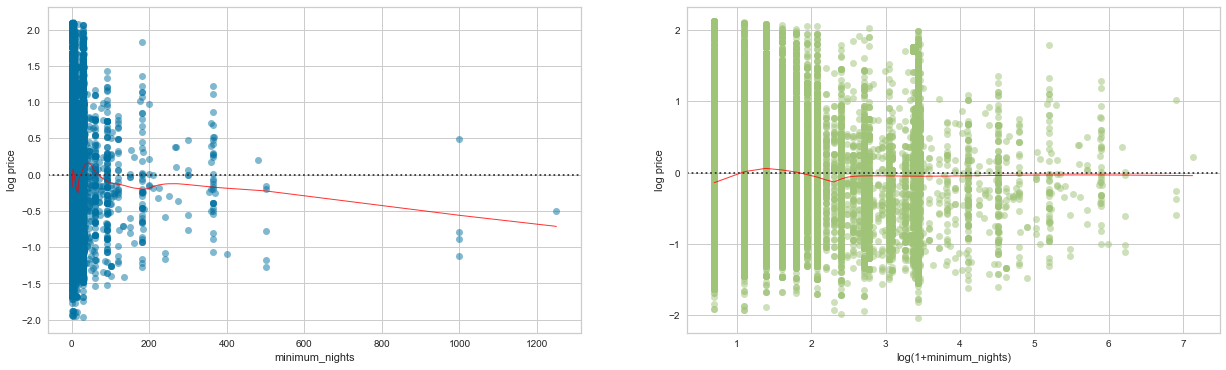

In [27]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.residplot(df['minimum_nights'], df['price'], lowess=True, ax=axes[0],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(np.log1p(df['minimum_nights']), df['price'], lowess=True, ax=axes[1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0].set_ylabel('log price')
axes[1].set_xlabel('log(1+minimum_nights)')
axes[1].set_ylabel('log price')

In [28]:
df['minimum_nights'] = np.log1p(df['minimum_nights'])

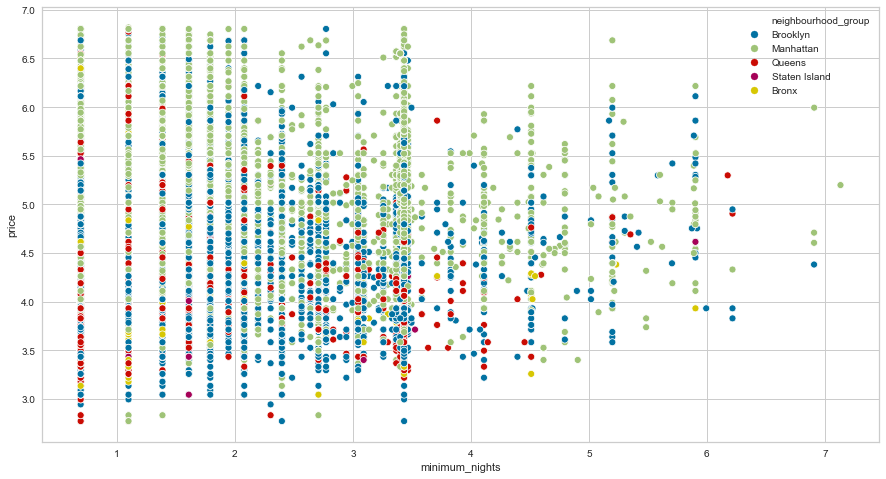

In [29]:
sns.scatterplot(x="minimum_nights", y="price", hue="neighbourhood_group", data=df)

<b>Number of Reviews</b>

Text(0.5, 0, 'log(1+number_of_reviews)')

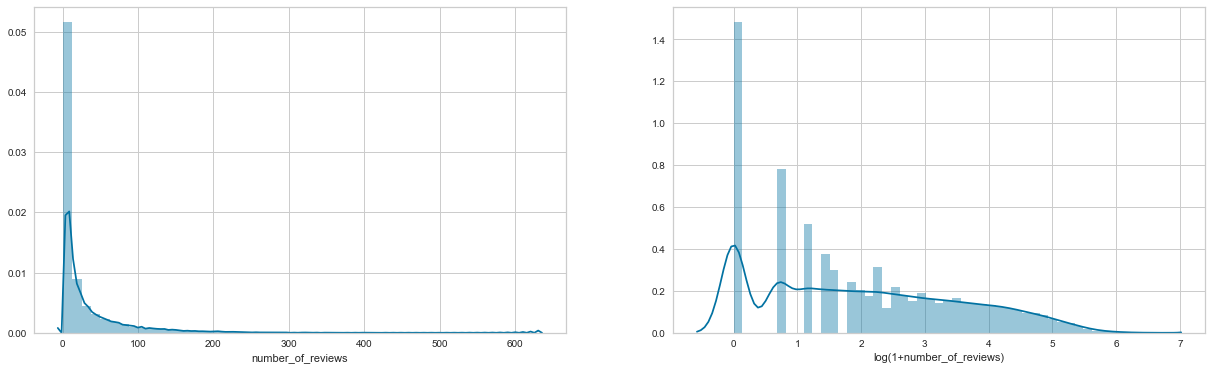

In [30]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['number_of_reviews'], ax=axes[0])
sns.distplot(np.log1p(df['number_of_reviews']), ax=axes[1])
axes[1].set_xlabel('log(1+number_of_reviews)')

(0, 7)

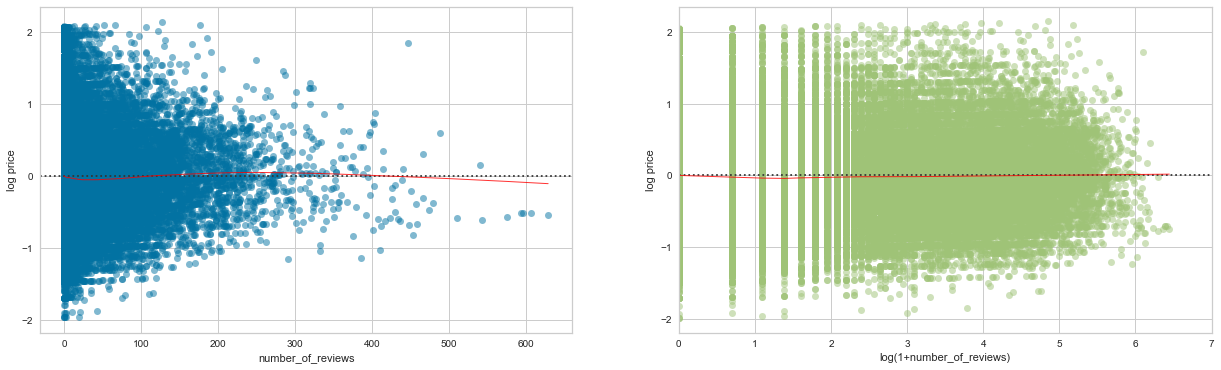

In [31]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.residplot(df['number_of_reviews'], df['price'], lowess=True, ax=axes[0],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(np.log1p(df['number_of_reviews']), df['price'], lowess=True, ax=axes[1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0].set_ylabel('log price')
axes[1].set_xlabel('log(1+number_of_reviews)')
axes[1].set_ylabel('log price')
axes[1].set_xlim(0,7)

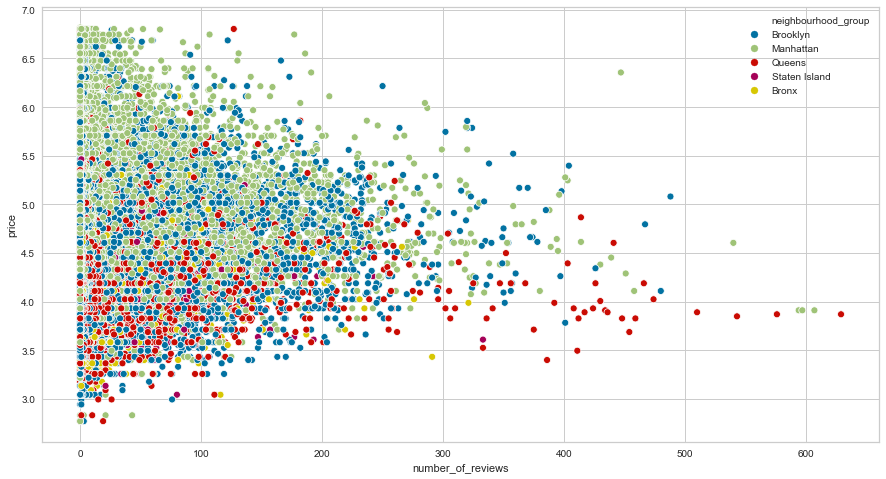

In [32]:
sns.scatterplot(x="number_of_reviews", y="price", hue="neighbourhood_group", data=df)

<b>Reviews Per Month</b>

Text(0.5, 0, 'log(1+reviews_per_months)')

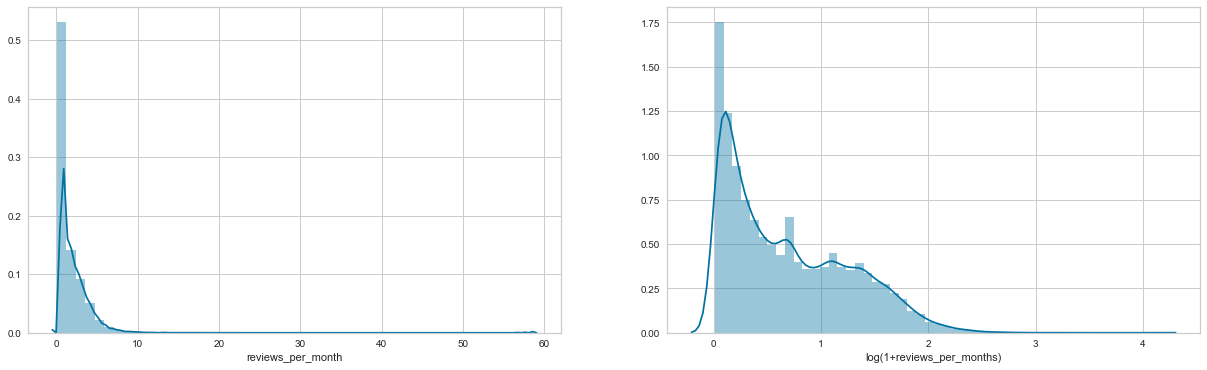

In [33]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df[df.reviews_per_month.notnull()].reviews_per_month, ax=axes[0])
sns.distplot(np.log1p(df[df.reviews_per_month.notnull()].reviews_per_month), ax=axes[1])
axes[1].set_xlabel('log(1+reviews_per_months)')

Text(0, 0.5, 'log price')

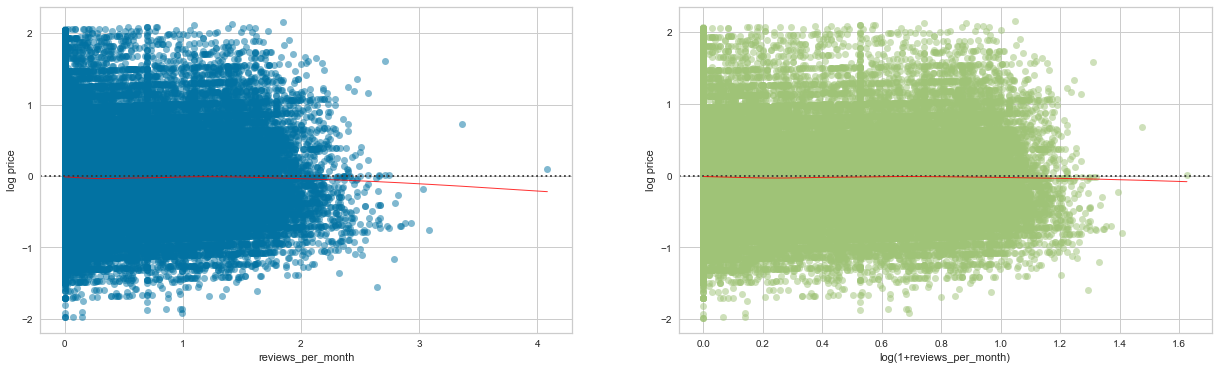

In [34]:
#Create df2 for non null values of "reviews_per_month"
df2=df.copy()
df2["reviews_per_month"].fillna(0, inplace=True)
df2["reviews_per_month"] = np.log1p(df2["reviews_per_month"])

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.residplot(df2['reviews_per_month'], df2['price'], lowess=True, ax=axes[0],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(np.log1p(df2['reviews_per_month']), df2['price'], lowess=True, ax=axes[1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0].set_ylabel('log price')
axes[1].set_xlabel('log(1+reviews_per_month)')
axes[1].set_ylabel('log price')

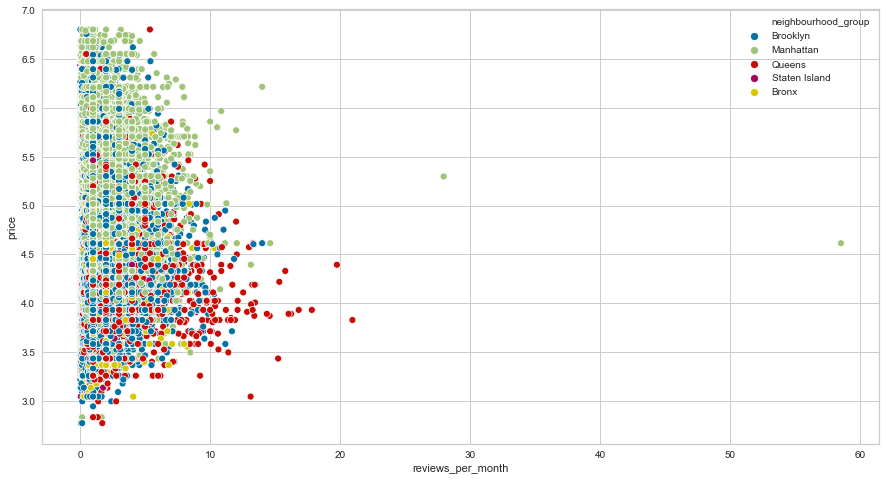

In [35]:
sns.scatterplot(x="reviews_per_month", y="price", hue="neighbourhood_group", data=df)

<b>Host IDs</b>

Text(0.5, 1.0, 'Hosts With Most Listings in NYC')

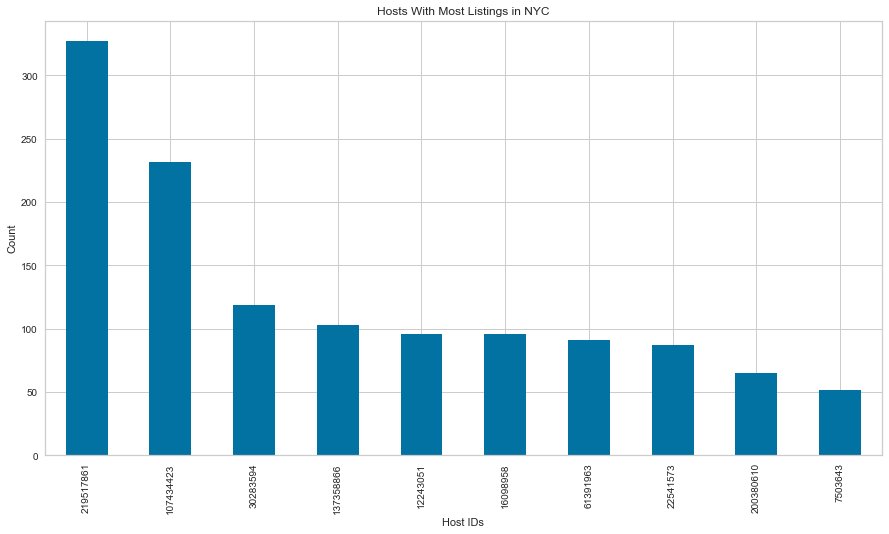

In [36]:
# Hosts With Most Listings in NYC
df.host_id.value_counts().head(10).plot(kind='bar')
plt.xlabel('Host IDs')
plt.ylabel('Count')
plt.title('Hosts With Most Listings in NYC')

In [37]:
# Top Host ID with 327 Listings in NYC
df.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     119
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

<b>Availability</b>

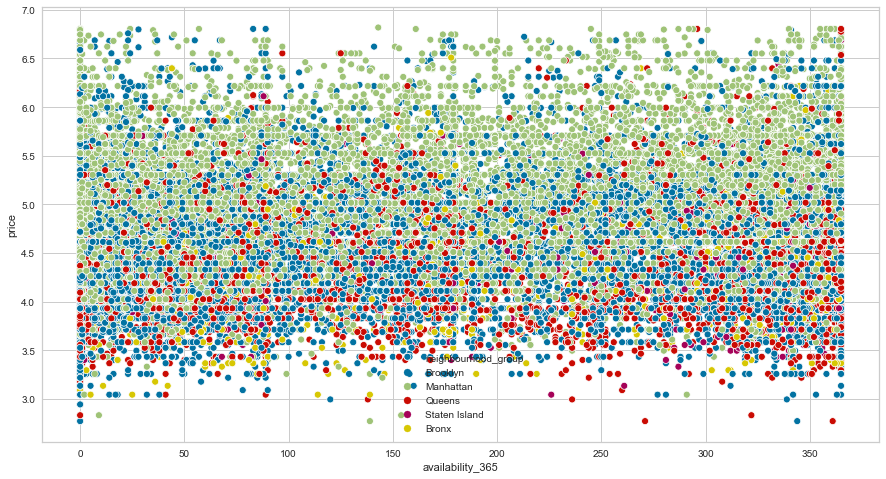

In [38]:
sns.scatterplot(x="availability_365", y="price", hue="neighbourhood_group", data=df)

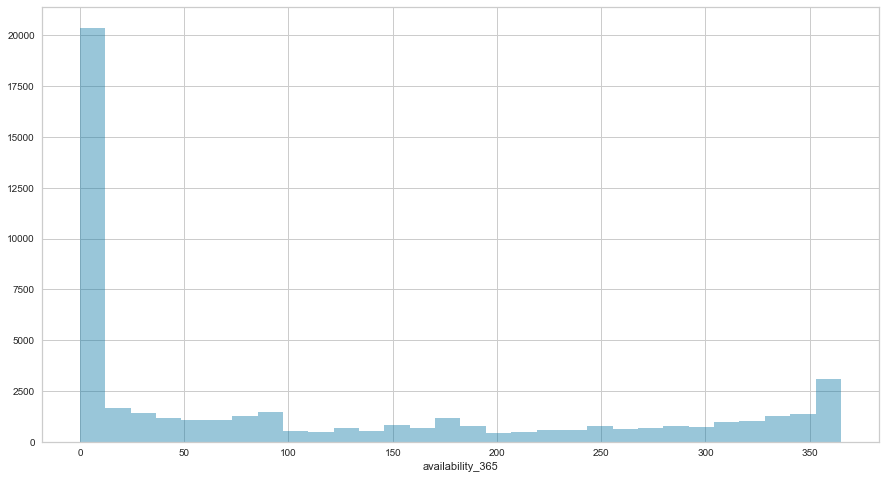

In [39]:
sns.distplot(df['availability_365'],kde=False)

(0, 6.5)

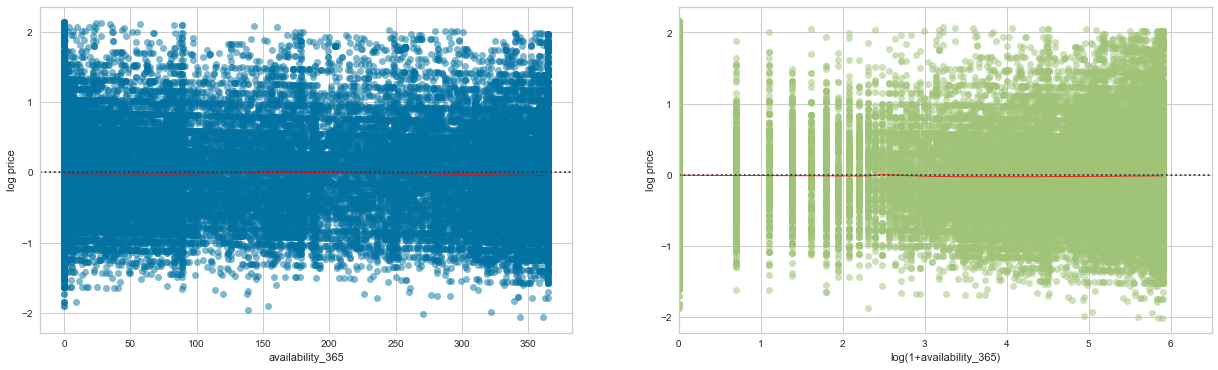

In [40]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.residplot(df['availability_365'], df['price'], lowess=True, ax=axes[0],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(np.log1p(df['availability_365']), df['price'], lowess=True, ax=axes[1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0].set_ylabel('log price')
axes[1].set_xlabel('log(1+availability_365)')
axes[1].set_ylabel('log price')
axes[1].set_xlim(0,6.5)

<b>Correlation Matrix</b>

[(10, 0)]

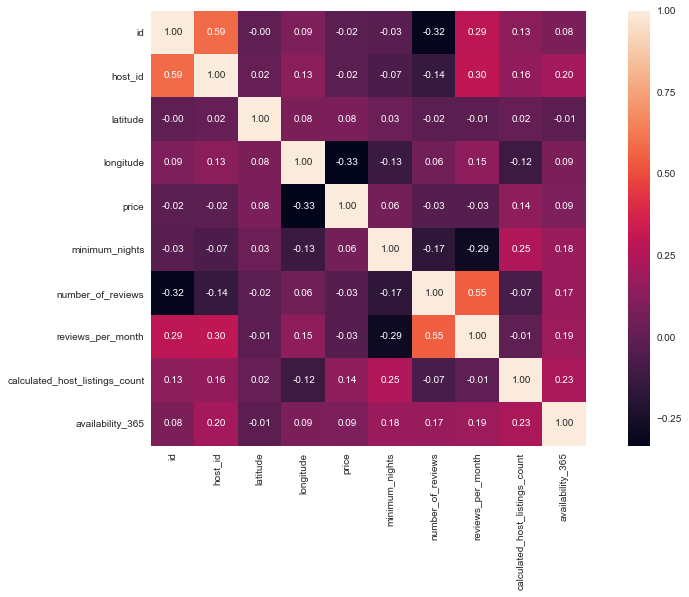

In [41]:
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f",
            square=True).set(ylim=(10, 0))

In [42]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(df.corr(method='pearson'))
multicollinearity
#From the below list of eigen values, no value is near zero, therefore no multicollinearity.

array([2.00748595, 1.78873739, 1.4582015 , 0.20632134, 1.14667082,
       1.03252576, 0.41706207, 0.54607748, 0.66644753, 0.73047015])

## 2.3 Geospatial Analysis

<b>Longitutde & Lattitude</b>

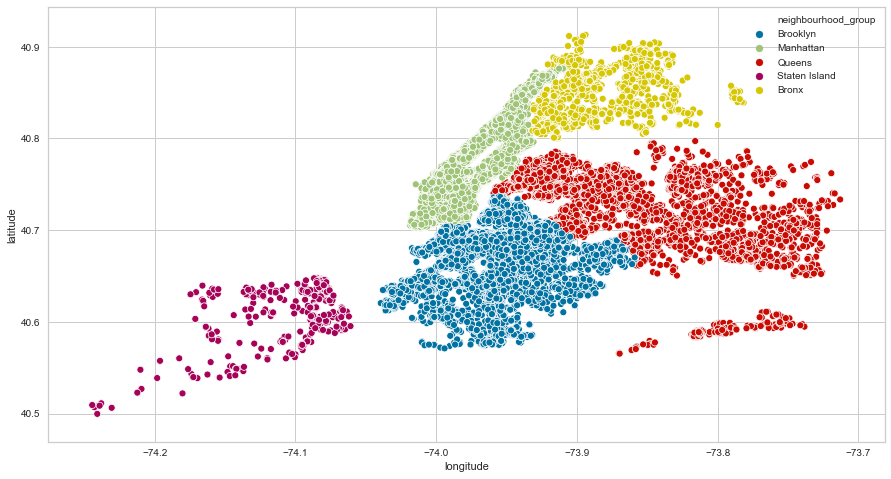

In [43]:
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", data=df)

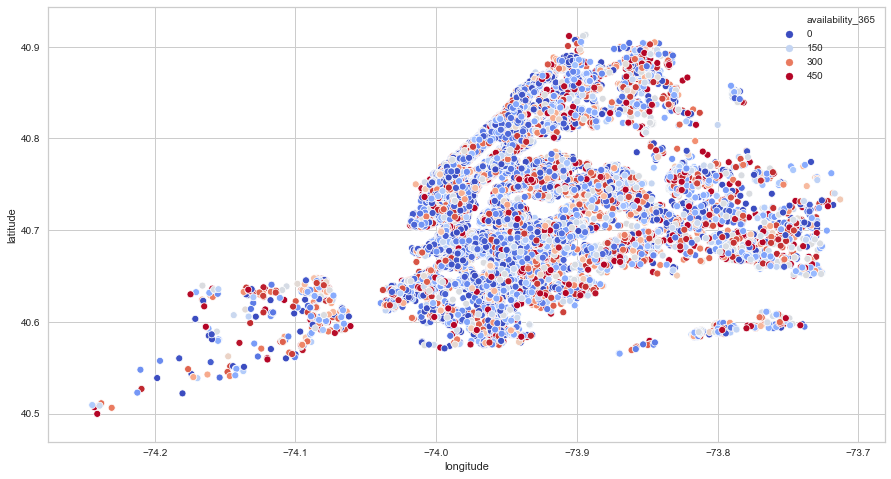

In [44]:
sns.scatterplot(x="longitude", y="latitude", hue="availability_365", data=df, palette='coolwarm')

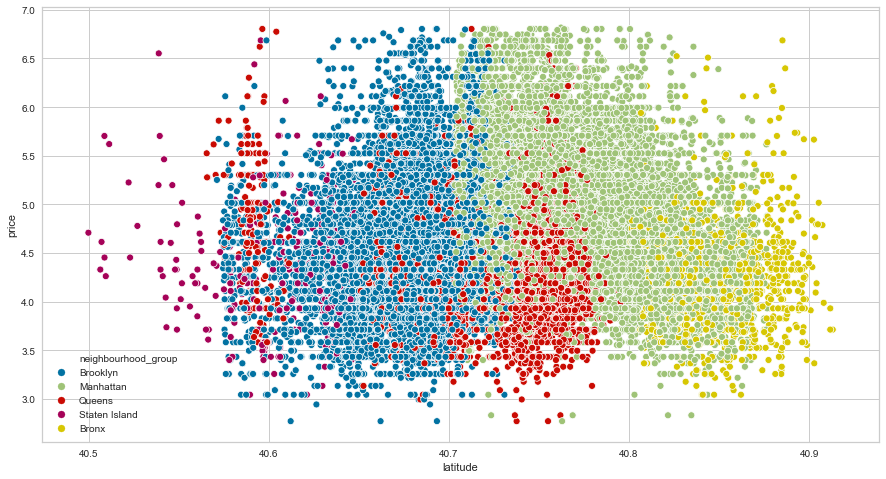

In [45]:
# Latitude vs Price
sns.scatterplot(x="latitude", y="price", hue="neighbourhood_group", data=df)

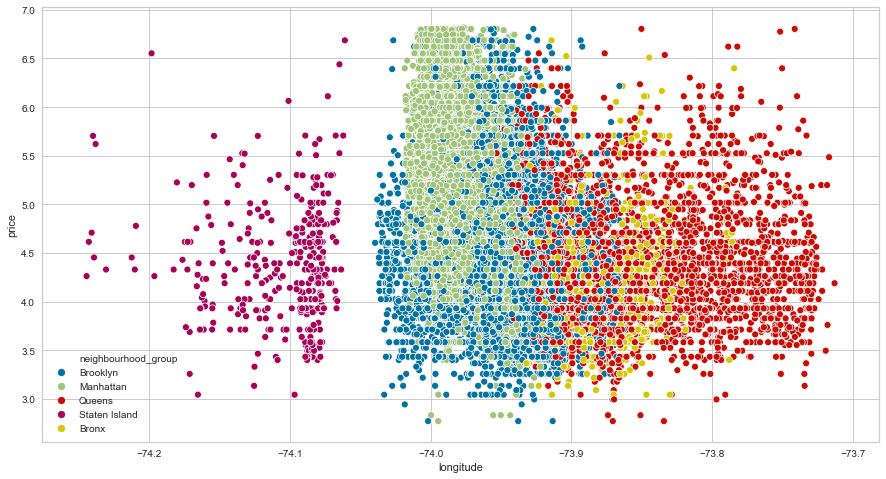

In [46]:
# Longitude vs Price
sns.scatterplot(x="longitude", y="price", hue="neighbourhood_group", data=df)

<b>Heatmap</b>

In [47]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(df[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

## 3. Preprocessing 

### 3.1 Missing Values 

In [48]:
df.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9863
reviews_per_month                 9863
calculated_host_listings_count       0
availability_365                     0
dtype: int64

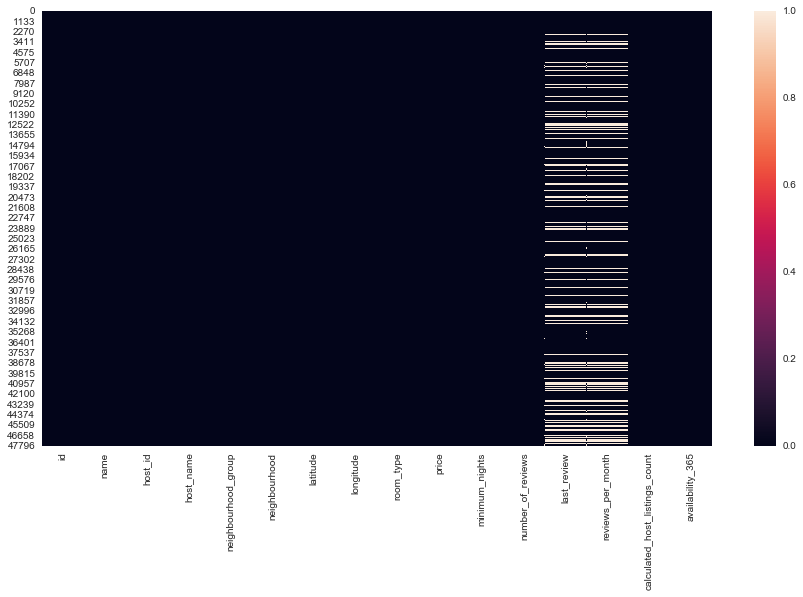

In [49]:
sns.heatmap(df.isnull())

In [50]:
df[df==0].count()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                  9863
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17429
dtype: int64

From the above codes, we can see that name, host id, last_review and reviews per month all have missing null values. Moreover, there are 11 rows that are 0 for price and 17533 rows that are 0 for availability_365. First, lets try to convert the values that are null. 

- For the Name coloumn, since there are only 16 rows that are null, we will just remove the row. (If those data are part of outliers, then it might skew the original dataset)


In [51]:
df = df.dropna(subset=['name'])

- For the host_name column, since there are host IDs representing the hosts of their respective listings, the name of the hosts will not be beneficial in feeding into our training model as it does not hold any significant meaning. Therefore we can drop the entire Host_name column 

In [52]:
df = df.drop(columns=['host_name'])

In [53]:
df[df.reviews_per_month.isnull()].head()

id                                               name  host_id  \
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   

   neighbourhood_group       neighbourhood  latitude  longitude  \
2            Manhattan              Harlem  40.80902  -73.94190   
19           Manhattan         East Harlem  40.79685  -73.94872   
26           Manhattan              Inwood  40.86754  -73.92639   
36            Brooklyn  Bedford-Stuyvesant  40.68876  -73.94312   
38            Brooklyn            Flatbush  40.63702  -73.96327   

          room_type     price  minimum_nights  number_of_reviews last_review  \
2      Private room  5.017280        1.386294                  0         NaT   
19  Entire home/apt  5.252273        2.079442                  0         NaT   
26     Private room  4.394449        1.609438                  0         NaT   
36     Private room  3.583519        4.110874                  0         NaT   
38     Private room  5.017280        0.693147                  0         NaT   

    reviews_per_month  calculated_host_listings_count  availability_365  
2                 NaN                               1               365  
19                NaN                               2               249  
26                NaN                               1                 0  
36                NaN                               1               365  
38                NaN                               1               365

- For both reviews_per_month column and last_review, we can see that if the number of reviews is 0, obviously the 2 columns will be null. For reviews_per_month, we can assign 0 to null values 

In [54]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

- For last_review column, we converted the date-time to ordinal numbers so the it will be more consistent with null values that we assigned to be 0

In [55]:
earliest = min(df['last_review'])
df['last_review'] = df['last_review'].fillna(earliest)
df['last_review'] = df['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

- Moreover, there were 11 observations where price was at 0. Let's drop them 

In [56]:
indexnames = df[df.price == 0].index
df = df.drop(indexnames)

#### 3.2 Feature Engineering

In [57]:
df['no_reviews'] = df['number_of_reviews'] == 0
df['lowavailability'] = df['availability_365'] < 12 
df['allyravail'] = df['availability_365'] > 353

In [58]:
df['room_value'] = df['room_type'].map({'Entire home/apt':3, 'Private room':2, 'Shared room':1})
df['neightbourhood_group_value'] = df['neighbourhood_group'].map({'Manhattan': 5,'Brooklyn':4,'Queens':3,'Staten Island':2,'Bronx':1})

In [59]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type     price  minimum_nights  number_of_reviews  \
0         Private room  5.010635        0.693147                  9   
1      Entire home/apt  5.420535        0.693147                 45   
2         Private room  5.017280        1.386294                  0   
3      Entire home/apt  4.499810        0.693147                270   
4      Entire home/apt  4.394449        2.397895                  9   
...                ...       ...             ...                ...   
48890     Private room  4.262680        1.098612                  0   
48891     Private room  3.713572        1.609438                  0   
48892  Entire home/apt  4.753590        2.397895                  0   
48893      Shared room  4.025352        0.693147                  0   
48894     Private room  4.510860        2.079442                  0   

       last_review  reviews_per_month  calculated_host_listings_count  \
0             2762               0.21                               6   
1             2976               0.38                               2   
2                0               0.00                               1   
3             3021               4.64                               1   
4             2793               0.10                               1   
...            ...                ...                             ...   
48890            0               0.00                               2   
48891            0               0.00                               2   
48892            0               0.00                               1   
48893            0               0.00                               6   
48894            0               0.00                               1   

       availability_365  no_reviews  lowavailability  allyravail  room_value  \
0                   365       False            False        True           2   
1                   355       False            False        True           3   
2                   365        True            False        True           2   
3                   194       False            False       False           3   
4                     0       False             True       False           3   
.

<b>Splitting Data into Categorical and Numerical Data</b>

In [60]:
categoryencode = df[['neighbourhood_group', 'room_type']]
numerical = df[['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','no_reviews','lowavailability','allyravail','room_value','neightbourhood_group_value']]

<b>Problem of High Feature Cardinality (Unique Values) for Categorical Data - Excess of Dimensionality</b> 
- To resolve this issue, we will only use the top 30 neighbourhood subarea and create a new column - others - for the rest of the areas as this will allow us to include all the significant areas while still keeping the rest of the data so we won't have over 221 new columns subsequent to One Hot Encoding


In [61]:
# Count of unique values for neighbourhood
len(df['neighbourhood'].unique())

221

In [62]:
categoryencode = pd.get_dummies(categoryencode)

In [63]:
category2encode = df[['neighbourhood']]

In [64]:
neighbourhood = category2encode['neighbourhood'].value_counts().head(30).index.tolist()

In [65]:
category2encode['neighbourhoodreplaced'] = category2encode['neighbourhood']
category2encode

/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


neighbourhood neighbourhoodreplaced
0              Kensington            Kensington
1                 Midtown               Midtown
2                  Harlem                Harlem
3            Clinton Hill          Clinton Hill
4             East Harlem           East Harlem
...                   ...                   ...
48890  Bedford-Stuyvesant    Bedford-Stuyvesant
48891            Bushwick              Bushwick
48892              Harlem                Harlem
48893      Hell's Kitchen        Hell's Kitchen
48894      Hell's Kitchen        Hell's Kitchen

[48491 rows x 2 columns]

In [66]:
category2encode.loc[~category2encode['neighbourhoodreplaced'].isin(neighbourhood),'neighbourhoodreplaced'] = 'other'

/anaconda3/envs/FTDS/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
category2encode['neighbourhoodreplaced'].value_counts()

other                        11807
Williamsburg                  3903
Bedford-Stuyvesant            3695
Harlem                        2648
Bushwick                      2455
Hell's Kitchen                1942
Upper West Side               1934
East Village                  1836
Upper East Side               1779
Crown Heights                 1559
Midtown                       1514
East Harlem                   1113
Greenpoint                    1111
Chelsea                       1093
Lower East Side                906
Washington Heights             897
Astoria                        896
West Village                   745
Financial District             738
Flatbush                       619
Clinton Hill                   566
Long Island City               535
Prospect-Lefferts Gardens      532
Park Slope                     501
East Flatbush                  499
Fort Greene                    487
Murray Hill                    481
Kips Bay                       466
Flushing            

In [68]:
neighbourhoodreplaced_dummies = pd.get_dummies(category2encode['neighbourhoodreplaced'],drop_first=True) # drop_first*

In [69]:
neighbourhoodreplaced_dummies

Bedford-Stuyvesant  Bushwick  Chelsea  Clinton Hill  Crown Heights  \
0                       0         0        0             0              0   
1                       0         0        0             0              0   
2                       0         0        0             0              0   
3                       0         0        0             1              0   
4                       0         0        0             0              0   
...                   ...       ...      ...           ...            ...   
48890                   1         0        0             0              0   
48891                   0         1        0             0              0   
48892                   0         0        0             0              0   
48893                   0         0        0             0              0   
48894                   0         0        0             0              0   

       East Flatbush  East Harlem  East Village  Financial District  Flatbush  \
0                  0            0             0                   0         0   
1                  0            0             0                   0         0   
2                  0            0             0                   0         0   
3                  0            0             0                   0         0   
4                  0            1             0                   0         0   
...              ...          ...           ...                 ...       ...   
48890              0            0             0                   0         0   
48891              0            0             0                   0         0   
48892              0            0             0                   0         0   
48893              0            0             0                   0         0   
48894              0            0             0                   0         0   

       ...  Park Slope  Prospect-Lefferts Gardens  Ridgewood  Sunset Park  \
0      ...           0                          0          0            0   
1      ...           0                          0          0            0   
2      ...           0                          0          0            0   
3      ...           0                          0          0            0   
4      ...           0                          0          0            0   
...    ...         ...                        ...        ...          ...   
48890  ...           0                          0          0            0   
48891  ...           0                          0          0            0   
48892  ...           0                          0          0            0   
48893  ...           0                          0          0            0   
48894  ...           0                          0          0            0   

       Upper East Side  Upper West Side  Washington Heights  West Village  \
0                    0                0                   0             0   
1                    0                0                   0             0   
2                    0                0                   0             0   
3                    0                0                   0             0   
4                    0                0                   0             0   
...                ...              ...                 ...           ...   
48890                0                0                   0             0   
48891                0                0                   0             0   
48892                0                0                   0             0   
48893                0                0                   0             0   
48894                0                0                   0             0   

       Williamsburg  other  
0                 0      1  
1                 0      0  
2                 0      0  
3                 0      0  
4                 0      0  
...             ...    ...  
48890             0      0  
48891             0      0 

In [70]:
categorical = pd.concat([neighbourhoodreplaced_dummies, categoryencode],sort=False,axis=1)
categorical

Bedford-Stuyvesant  Bushwick  Chelsea  Clinton Hill  Crown Heights  \
0                       0         0        0             0              0   
1                       0         0        0             0              0   
2                       0         0        0             0              0   
3                       0         0        0             1              0   
4                       0         0        0             0              0   
...                   ...       ...      ...           ...            ...   
48890                   1         0        0             0              0   
48891                   0         1        0             0              0   
48892                   0         0        0             0              0   
48893                   0         0        0             0              0   
48894                   0         0        0             0              0   

       East Flatbush  East Harlem  East Village  Financial District  Flatbush  \
0                  0            0             0                   0         0   
1                  0            0             0                   0         0   
2                  0            0             0                   0         0   
3                  0            0             0                   0         0   
4                  0            1             0                   0         0   
...              ...          ...           ...                 ...       ...   
48890              0            0             0                   0         0   
48891              0            0             0                   0         0   
48892              0            0             0                   0         0   
48893              0            0             0                   0         0   
48894              0            0             0                   0         0   

       ...  Williamsburg  other  neighbourhood_group_Bronx  \
0      ...             0      1                          0   
1      ...             0      0                          0   
2      ...             0      0                          0   
3      ...             0      0                          0   
4      ...             0      0                          0   
...    ...           ...    ...                        ...   
48890  ...             0      0                          0   
48891  ...             0      0                          0   
48892  ...             0      0                          0   
48893  ...             0      0                          0   
48894  ...             0      0                          0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                                 1                              0   
1                                 0                              1   
2                                 0                              1   
3                                 1                              0   
4                                 0                              1   
...                             ...                            ...   
48890                             1                              0   
48891                             1                              0   
48892                             0                              1   
48893                             0                              1   
48894                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   
...                           ...                                ...   
48890              

<b> Multicollinearity - Variance Inflation Factor (VIF) </b>

In [71]:
# Concatenate categorical and numerical columns to perform VIF of all values, then determine which one to drop 
testx = pd.concat([categorical,numerical.drop(columns=['price'])],axis=1)
colnames = testx.columns

# Perform Scaling
scaler = StandardScaler()
testx = scaler.fit_transform(testx)
testx = pd.DataFrame(testx, columns=colnames)
testx

Bedford-Stuyvesant  Bushwick   Chelsea  Clinton Hill  Crown Heights  \
0               -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
1               -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
2               -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
3               -0.287202 -0.230928 -0.151855      9.201801      -0.182259   
4               -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
...                   ...       ...       ...           ...            ...   
48486            3.481869 -0.230928 -0.151855     -0.108674      -0.182259   
48487           -0.287202  4.330350 -0.151855     -0.108674      -0.182259   
48488           -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
48489           -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   
48490           -0.287202 -0.230928 -0.151855     -0.108674      -0.182259   

       East Flatbush  East Harlem  East Village  Financial District  Flatbush  \
0          -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
1          -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
2          -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
3          -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
4          -0.101968     6.524403     -0.198375           -0.124316 -0.113712   
...              ...          ...           ...                 ...       ...   
48486      -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
48487      -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
48488      -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
48489      -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   
48490      -0.101968    -0.153271     -0.198375           -0.124316 -0.113712   

       ...  number_of_reviews  last_review  reviews_per_month  \
0      ...          -0.322234     0.491316          -0.553616   
1      ...           0.483518     0.674920          -0.447383   
2      ...          -0.523672    -1.878385          -0.684844   
3      ...           5.519468     0.713529           2.214680   
4      ...          -0.322234     0.517913          -0.622354   
...    ...                ...          ...                ...   
48486  ...          -0.523672    -1.878385          -0.684844   
48487  ...          -0.523672    -1.878385          -0.684844   
48488  ...          -0.523672    -1.878385          -0.684844   
48489  ...          -0.523672    -1.878385          -0.684844   
48490  ...          -0.523672    -1.878385          -0.684844   

       calculated_host_listings_count  availability_365  no_reviews  \
0                           -0.035548          1.924255   -0.504983   
1                           -0.156484          1.848114   -0.504983   
2                           -0.186718          1.924255    1.980264   
3                           -0.186718          0.622237   -0.504983   
4                           -0.186718         -0.854907   -0.504983   
...                               ...               ...         ...   
48486                       -0.156484         -0.786380    1.980264   
48487                       -0.156484         -0.580798    1.980264   
48488                       -0.186718         -0.649325    1.980264   
48489                       -0.035548         -0.839679    1.980264   
48490                       -0.186718         -0.679782    1.980264   

       lowavailability  allyravail  room_value  neightbourhood_group_value  
0            -0.844882    3.908658   -0.906299                   -0.283244  
1            -0.844882    3.908658    0.927668                    0.886470  
2            -0.844882    3.908658   -0.906299                    0.886470  
3            -0.844882   -0.255842    0.927668                   -0.283244  
4             1.183597   -0.255842    0.927668                    0.886470  
.

In [72]:
import statsmodels.api as sm
#import warnings
#from scipy import stats
#warnings.filterwarnings('ignore')
threshold = 17

l_col=[]
l_r2=[]
l_vif=[]
l_dcol=[]
for i in range(0, len(colnames)):
    ty = testx.loc[:, testx.columns == colnames[i]]
    tx = testx.loc[:, testx.columns != colnames[i]]
    model = sm.OLS(ty, tx)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1-rsq), 2)
    #print("R Sq of {} is {}".format(colnames[i],(round(rsq,2))))
    #print("VIF of {} is {}\n".format(colnames[i], vif))
    l_col.append(colnames[i])
    l_r2.append(round(rsq,2))
    l_vif.append(vif)
    if ~(vif < threshold):
        l_dcol.append(colnames[i])

df_vif = pd.DataFrame({"col":l_col, "r2":l_r2, "vif":l_vif})

/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [73]:
df_vif.sort_values(by=['r2'], ascending=False)

col    r2    vif
50         neightbourhood_group_value  1.00    inf
49                         room_value  1.00    inf
37              room_type_Shared room  1.00    inf
36             room_type_Private room  1.00    inf
35          room_type_Entire home/apt  1.00    inf
34  neighbourhood_group_Staten Island  1.00    inf
33         neighbourhood_group_Queens  1.00    inf
32      neighbourhood_group_Manhattan  1.00    inf
31       neighbourhood_group_Brooklyn  1.00    inf
30          neighbourhood_group_Bronx  1.00    inf
42                        last_review  0.93  14.38
29                              other  0.93  15.19
46                         no_reviews  0.92  12.71
28                       Williamsburg  0.88   8.23
0                  Bedford-Stuyvesant  0.88   8.18
38                           latitude  0.87   7.54
13                             Harlem  0.85   6.64
1                            Bushwick  0.84   6.36
25                    Upper West Side  0.79   4.68
39                          longitude  0.79   4.86
24                    Upper East Side  0.79   4.67
7                        East Village  0.79   4.71
14                     Hell's Kitchen  0.78   4.56
4                       Crown Heights  0.76   4.12
18                            Midtown  0.75   3.97
6                         East Harlem  0.71   3.47
26                 Washington Heights  0.69   3.20
12                         Greenpoint  0.69   3.25
2                             Chelsea  0.67   3.07
45                   availability_365  0.66   2.90
17                    Lower East Side  0.66   2.90
8                  Financial District  0.64   2.76
47                    lowavailability  0.61   2.58
27                       West Village  0.59   2.44
9                            Flatbush  0.56   2.26
5                       East Flatbush  0.52   2.09
21          Prospect-Lefferts Gardens  0.52   2.07
3                        Clinton Hill  0.52   2.07
43                  reviews_per_month  0.51   2.04
19                        Murray Hill  0.50   2.00
15                           Kips Bay  0.49   1.95
20                         Park Slope  0.48   1.92
11                        Fort Greene  0.47   1.89
23                        Sunset Park  0.41   1.70
10                           Flushing  0.40   1.66
16                   Long Island City  0.37   1.59
41                  number_of_reviews  0.37   1.60
22                          Ridgewood  0.35   1.54
48                         allyravail  0.30   1.43
44     calculated_host_listings_count  0.28   1.39
40                     minimum_nights  0.21   1.27

For values with VIF > threshold (i.e. indicating multi-collinearity), some of the following features will be eliminated from the analysis:

In [74]:
l_dcol

['neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'room_value',
 'neightbourhood_group_value']

In [75]:
# These 2 values will be removed
vifdcol = ['room_value', 'neightbourhood_group_value']

### 3.3 Perform Scaling & Train-Test Split

In [76]:
# Splitting x & y variables
x = pd.concat([categorical,numerical.drop(columns=['price'])],axis=1)
y = numerical['price']

In [77]:
x = x.drop(columns = vifdcol)

In [78]:
print(x.shape)
print(y.shape)

(48491, 49)
(48491,)


In [79]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38792, 49)
(9699, 49)
(38792,)
(9699,)


In [170]:
X_train


array([[-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
         1.18359669, -0.25584226],
       [-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
         1.18359669, -0.25584226],
       [-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
        -0.84488239,  3.90865833],
       ...,
       [-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
        -0.84488239, -0.25584226],
       [-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
        -0.84488239, -0.25584226],
       [-0.28720209, -0.23092819, -0.15185534, ..., -0.50498319,
         1.18359669, -0.25584226]])

## 4. Training Model

In [82]:
# Adjusted R2 Score
def adjusted_r2(r2_score):
    adjustedr2 = 1 - (1 - r2_score ** 2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    return adjustedr2

##### 4.1 Linear Regression Model

In [83]:
# Linear Regression
linmodel = LinearRegression()

# Train the model using training set
linmodel.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = linmodel.predict(X_test)

In [84]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)
    
linregmodel = pd.DataFrame([{'Model':'Linear Regression Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
linregmodel

Model       MAE       MSE      RMSE  R2 Score  \
0  Linear Regression Model  0.315077  0.171632  0.414285  0.586677   

   Adjusted R2 Score  
0            0.34336

<b>Residual Plots - Taking a Closer Look at the Presence of Heteroskedasticity in our Data</b>

Heteroskedasticity is a phenomenon where the residual or error terms of a linear regression model are equally scattered - usually a cone/fan-like shape
- It is a violation of linear regression's assumption as it assumes that the spread of the residuals is constant across the plot
- While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise
- Standard errors will be biased, along with their corresponding test statistics and confidence intervals

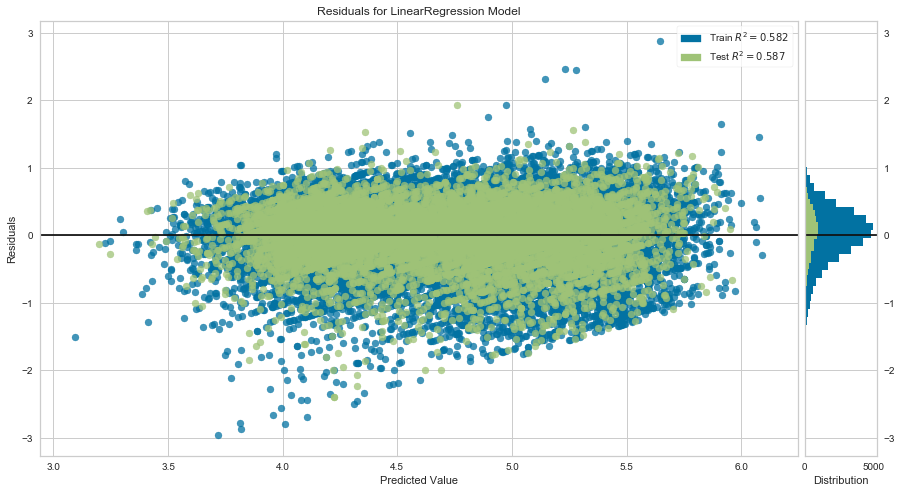

In [83]:
matplotlib.rcParams['figure.figsize'] = (15,8)

visualizer = ResidualsPlot(linmodel)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In the residual plot above, we can see that the Y-axis are the differences between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. It can be observed that that residuals are condensed into one area, while some are dispersed elsewhere. The linear model seems to be an okay fit for our dataset as the error distribution of the histogram is normalized at the zero point.

<b>Prediction Error</b>
- A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. 

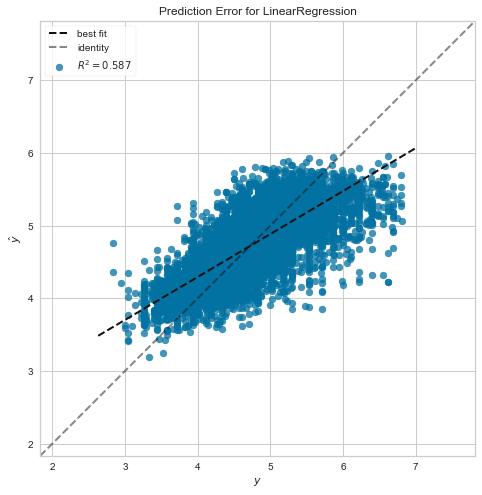

In [84]:
matplotlib.rcParams['figure.figsize'] = (20,8)

visualizer = PredictionError(linmodel)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<b>Learning Curve</b>

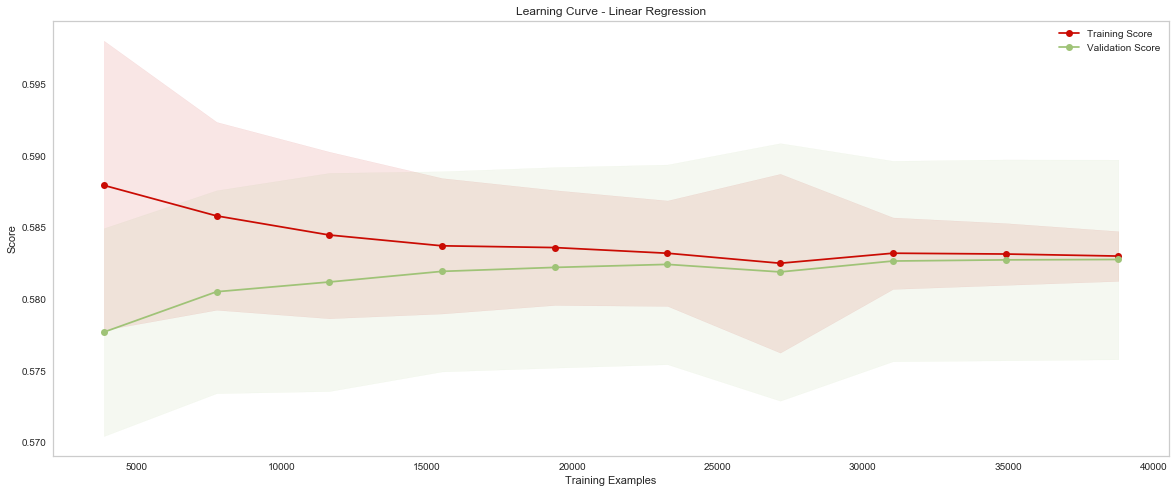

In [85]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), x, y, train_sizes =np.linspace(0.1,1,10) , cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1) 
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,color='g')


plt.plot(train_sizes,train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes,test_scores_mean, 'o-', color='g', label='Validation Score')
plt.legend()

plt.title('Learning Curve - Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.show()


- With training sample size at 5000, the model will be more prone to overfitting as the training score is relatively high following with a low validation accuracy, it will not generalize well.

- Howerver, as we add more training samples it becomes harder for the model to fit the data - so you get a lower training accuracy, but the model will work better with new data (i.e. validation/test accuracy starts to rise).

- As the training dataset increases, the training accuracy is supposed to decrease because more data is harder to fit well.

- As the training dataset increases, the validation/test accuracy is supposed to increase as well since less overfitting means better generalization.

##### 4.2 Polynomial Regression Model

In [86]:
polyf = PolynomialFeatures(degree=2)

#transform the features to higher degree features.
X_train_poly = polyf.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

y_pred = poly_reg.predict(polyf.fit_transform(X_test))

In [87]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)

In [88]:
polyregmodel = pd.DataFrame([{'Model':'Polynomial Regression Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
polyregmodel

Model           MAE           MSE          RMSE  \
0  Polynomial Regression Model  1.785927e+08  3.093531e+20  1.758844e+10   

       R2 Score  Adjusted R2 Score  
0 -7.449810e+20       5.556986e+41

##### 4.3 Random Forest Regression Model

In [85]:
# Random Forest Regressor 
rndcl = RandomForestRegressor(n_estimators = 500)
rndcl.fit(X_train,Y_train)
y_pred = rndcl.predict(X_test)

In [86]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)

In [87]:
rndfrmodel = pd.DataFrame([{'Model':'Random Forest Regressor Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
rndfrmodel

Model       MAE       MSE      RMSE  R2 Score  \
0  Random Forest Regressor Model  0.286514  0.147868  0.384537  0.643905   

   Adjusted R2 Score  
0           0.413873

In [92]:
estimators = np.arange(100, 1000, 100)
scores = []
rndcl = RandomForestRegressor()
for n in estimators:
    rndcl.set_params(n_estimators=n)
    rndcl.fit(X_train, Y_train)
    scores.append(rndcl.score(X_test, Y_test))

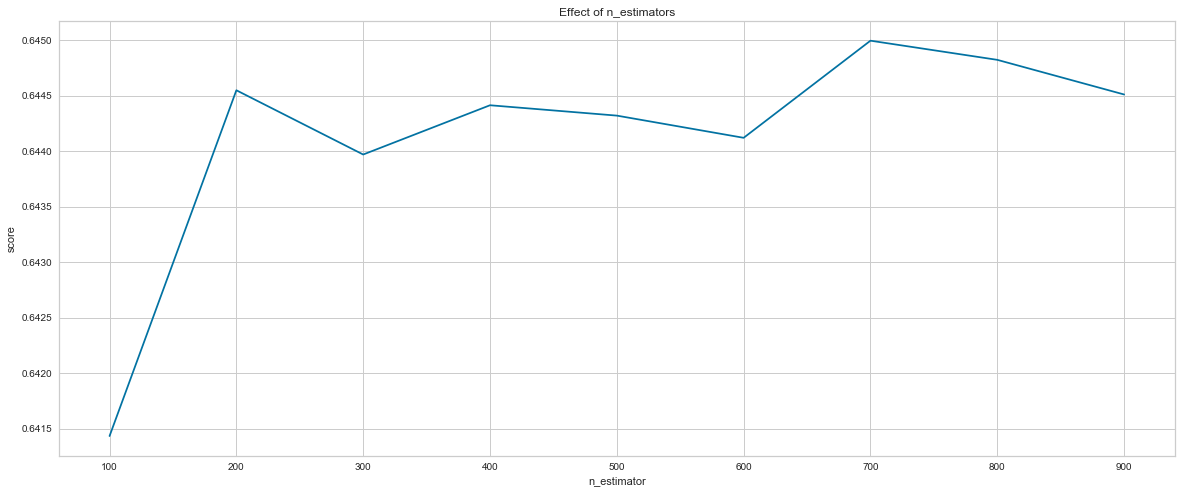

In [93]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

<b>Validation Curve</b>

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/skl

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/skl

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/skl

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/skl

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/FTDS/lib/python3.7/site-packages/skl

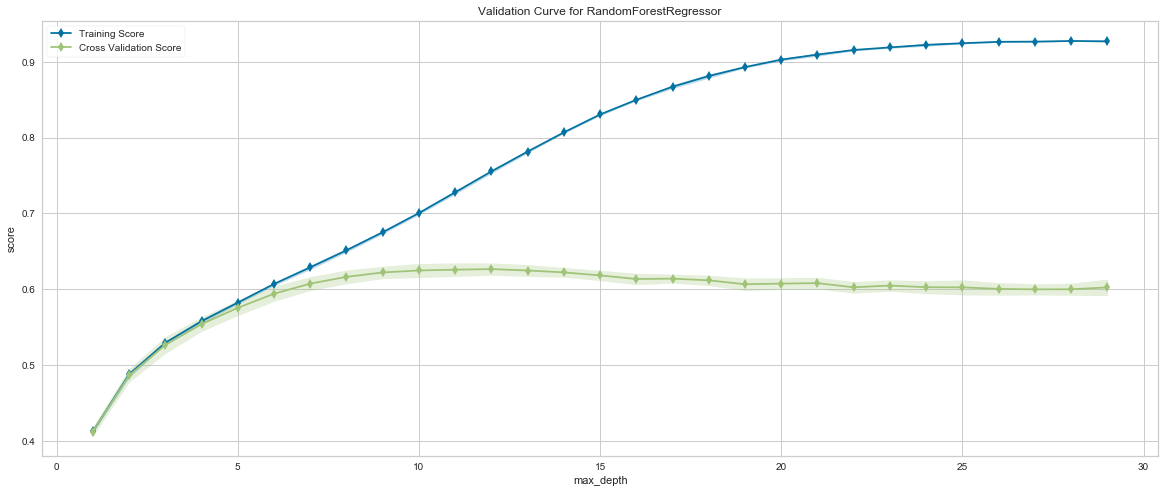

In [94]:
cv = KFold(5)
rndfrvalcurve = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 30), cv=cv, scoring="r2"
)

# Fit and show the visualizer
rndfrvalcurve.fit(X_train, Y_train)
rndfrvalcurve.show()

The validation curve shows the performance score for a 30 max depths by a training and validation set as it can be inferred that the more depth allowed in our Random Forest Regressor will contribute to massive over fitting of the data seen by the gap of the two curves. It can be seen that as max depth increases the training score increases, but the validation set will start to fail to generalize on unseen data.

##### 4.4 Support Vector Machine 

In [95]:
svc = SVR(C=1)
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)

/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [96]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)
    
svrmodel = pd.DataFrame([{'Model':'SVR Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
svrmodel

Model       MAE       MSE      RMSE  R2 Score  Adjusted R2 Score
0  SVR Model  0.294716  0.157656  0.397059  0.620336           0.384038

##### 4.5 AdaBoost Regression Model

In [97]:
adboost = AdaBoostRegressor()
adboost.fit(X_train, Y_train)
y_pred = adboost.predict(X_test)

In [98]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)
    
adaboost = pd.DataFrame([{'Model':'AdaBoost Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
adaboost

Model       MAE       MSE      RMSE  R2 Score  Adjusted R2 Score
0  AdaBoost Model  0.358639  0.207319  0.455322  0.500737            0.24979

##### 4.6 XGBoost Regression Model

In [99]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)

/anaconda3/envs/FTDS/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:23:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)
    
xgboostmodel = pd.DataFrame([{'Model':'XGBoost Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
xgboostmodel

Model       MAE       MSE      RMSE  R2 Score  Adjusted R2 Score
0  XGBoost Model  0.297973  0.154529  0.393102  0.627864           0.393447

### 5 Feature Selection

After testing out the model with only multicolinear features that are removed, we can proceed to perform feature selection to get the optimal features in our model

In [105]:
dfx = pd.concat([categorical,numerical.drop(columns=['price','room_value','neightbourhood_group_value'])],axis=1)

#### 5.1 Filter Method
- It measures the relevance of features by their correlation with dependent variable

<b> Feature Importance</b>

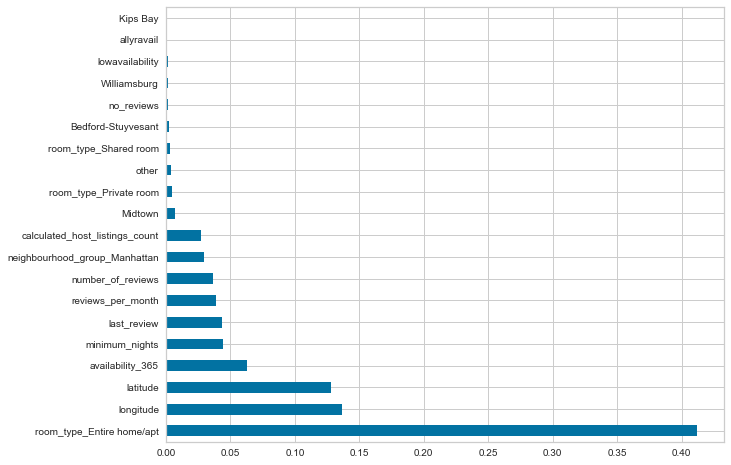

In [107]:
matplotlib.rcParams['figure.figsize'] = (10,8)

rndcl = RandomForestRegressor(n_estimators = 500)
rndcl.fit(X_train,Y_train)
feat_import = pd.Series(rndcl.feature_importances_, index=dfx.columns)
feat_import.nlargest(20).plot(kind='barh')

In [108]:
important_features = feat_import.sort_values(ascending=False).head(15).index.tolist()

In [109]:
important_features

['room_type_Entire home/apt',
 'longitude',
 'latitude',
 'availability_365',
 'minimum_nights',
 'last_review',
 'reviews_per_month',
 'number_of_reviews',
 'neighbourhood_group_Manhattan',
 'calculated_host_listings_count',
 'Midtown',
 'room_type_Private room',
 'other',
 'room_type_Shared room',
 'Bedford-Stuyvesant']

In [112]:
testdfx = dfx[important_features]

In [113]:
scaler = StandardScaler()
testdfx = scaler.fit_transform(testdfx)
dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(testdfx, y, test_size = 0.2, random_state=40)

In [125]:
def adjusted_r2(r2_score):
    adjustedr2 = 1 - (1 - r2_score ** 2) * ((dfX_train.shape[0] - 1) / (dfX_train.shape[0] - dfX_train.shape[1] - 1))
    return adjustedr2

In [126]:
# Linear Regression
linmodel = LinearRegression()

linmodel.fit(dfX_train, dfY_train)

dfy_pred = linmodel.predict(dfX_test)

In [127]:
mae = mean_absolute_error(dfY_test, dfy_pred)
mse = mean_squared_error(dfY_test,dfy_pred)
rmse = math.sqrt(mean_squared_error(dfY_test,dfy_pred))
r2 = r2_score(dfY_test, dfy_pred)
adjusted_r2_score = adjusted_r2(r2)

linregmodel2 = pd.DataFrame([{'Model':'Linear Regression Model2', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
linregmodel2

Model       MAE       MSE      RMSE  R2 Score  \
0  Linear Regression Model2  0.334602  0.190761  0.436762  0.540611   

   Adjusted R2 Score  
0           0.291986

In [134]:
# Random Forest Regressor
rndcl = RandomForestRegressor(n_estimators = 500)
rndcl.fit(dfX_train,dfY_train)
dfy_pred = rndcl.predict(dfX_test)

In [135]:
mae = mean_absolute_error(dfY_test, dfy_pred)
mse = mean_squared_error(dfY_test,dfy_pred)
rmse = math.sqrt(mean_squared_error(dfY_test,dfy_pred))
r2 = r2_score(dfY_test, dfy_pred)
adjusted_r2_score = adjusted_r2(r2)

rndfrmodel2 = pd.DataFrame([{'Model':'Random Forest Model 2', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
rndfrmodel2

Model      MAE       MSE      RMSE  R2 Score  \
0  Random Forest Model 2  0.28613  0.147581  0.384163  0.644596   

   Adjusted R2 Score  
0           0.415278

#### 5.2 Wrapper Method
- It measures the usefulness of a feature by actually training a model on it and analysing the performance score and feeding it back to the model with different features to return the optimal features - wrapping

<b>Recursive Feature Elimination</b>
- It fits a model and removes the weakest feature (or features) until the specified number of features is reached

KeyboardInterrupt: 

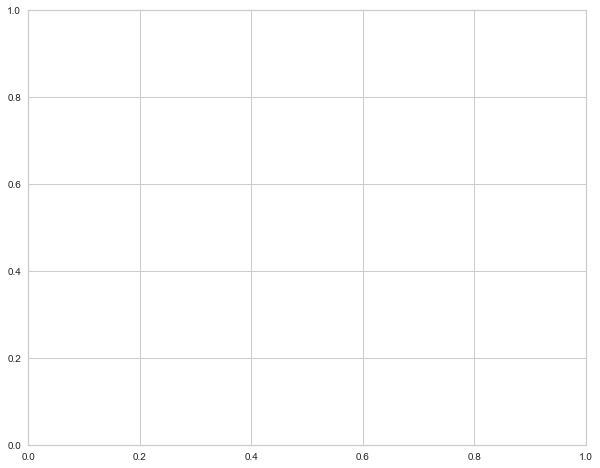

In [165]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
cv = KFold(5)
visualizer = RFECV(RandomForestRegressor(), cv=cv, scoring='r2')

visualizer.fit(X_train, Y_train)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

[Image of RFE]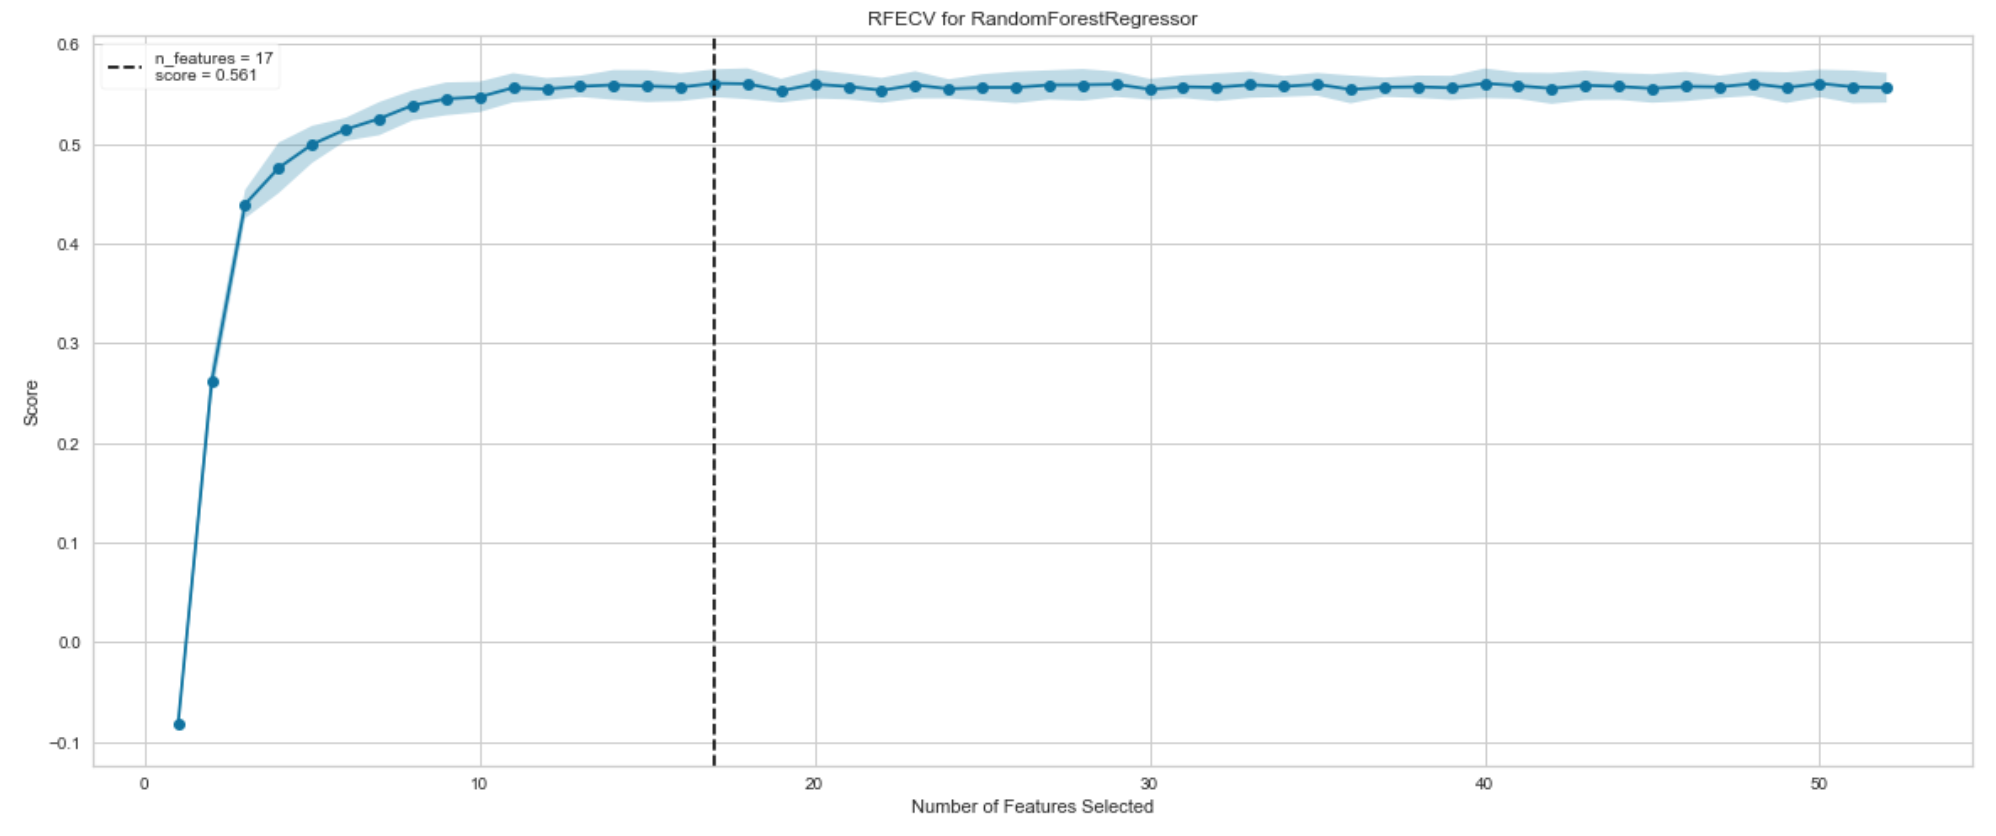

#### 5.3 Embedded Method
- It is quite similar to wrapper methods since they are also used to optimize the objective function or performance of a learning algorithm or model. The difference is that an intrinsic model building metric is used during learning for optimization.

<b>Lasso Regression </b>

In [167]:
# Lasso 
regr = Lasso(alpha=0.1)

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(Y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(Y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(Y_test, y_pred):.2f}')

r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)

print(adjusted_r2_score)

Coefficients: 
 [-0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.07032864 -0.         -0.          0.30310613
 -0.         -0.          0.         -0.02973663 -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.        ]
Mean squared error: 0.23
Root Mean squared error: 0.48
Variance score: 0.45
0.19930906648992808


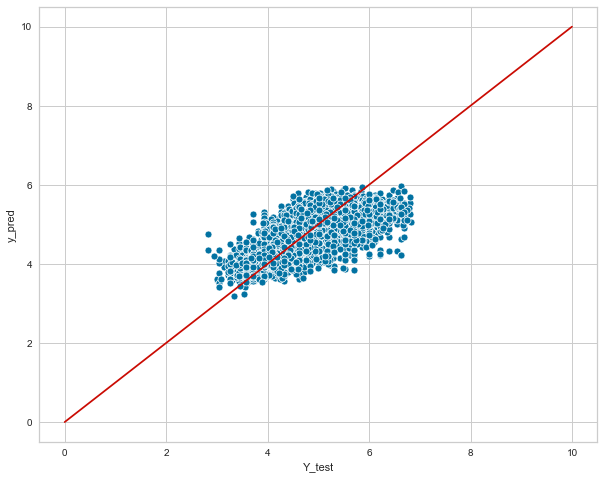

In [137]:
y_pred = y_pred.reshape(-1,)
y_data = Y_test.values.reshape(-1,)

plot_lr = sns.scatterplot(y_data, y_pred)
plot_lr.set(xlabel='Y_test', ylabel='y_pred')

# generate and graph y = x line
x_plot = np.linspace(0,10,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### 6. Hyperparameter Tuning

From the results above, we can proceed hyperparameter tuning with Random Forest Regressor as it obtained the best r2 score compared to Linear, Polynomial, SVR, and other Boosting methods. We can perform GridSearchCV to narrow down the most important parameter to tune and then input it back to the Random Forest Regressor model.

In [144]:
# GridSearchCV
cv = KFold(5)
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 8, 10, 12, 15],
    'n_estimators': [700],
    'max_features': ['auto','sqrt','log2']    
}

# Create a based model
rfr = RandomForestRegressor()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 2)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 33.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs

In [145]:
print(grid.score(X_test, Y_test))
print(grid.best_params_)
print(grid.best_estimator_)

0.6482658968564612
{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 700}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [155]:
# Random Forest Regressor 
rndcl1 = RandomForestRegressor(n_estimators = 700,max_depth=15, n_jobs=-1,random_state=42)
rndcl1.fit(X_train,Y_train)
y_pred = rndcl1.predict(X_test)

In [156]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test, y_pred)
adjusted_r2_score = adjusted_r2(r2)

In [157]:
bestmodel = pd.DataFrame([{'Model':'Random Forest Regressor Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])

### 7. Conclusion

<b>Buisness Recommendation</b>

- From EDA, we can see that Manhattan and Brooklyn are popular places for Airbnb rentals compared to other locations such as Queens, Staten Island, and Bronx.  The supply of shared room is obviously less than private rooms and entire apartments.

- In terms of Airbnb business, since rentals in Manhatten and Brooklyn are more competitive, they should focus on entire apartments and private rooms in general to keep increasing business revenue due to popularity and availability. As compared with other room types, shared room is less popular.

- As for hosts, one should try to enlist more shared room options as the market availability is low.
    
- Airbnb should also encourage more listings available in other areas that are less popular such as Bronx, Staten Island, and Queens to provide more options with people traveling there as Manhattan and Brooklyn comprised 85% of the listings in New York

- They can also develop a rebate mechanism for travellers to post reviews after their stay especially in the 3 least travelled neighbourhood groups, since availibities and vacancies are more frequent in these areas 

<b>Model Summary</b>

In [149]:
summary = pd.concat([linregmodel,polyregmodel,rndfrmodel, svrmodel,adaboost,xgboostmodel])
#best_model = bestmodel = pd.DataFrame([{'Model':'Random Forest Regressor Model', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 Score': adjusted_r2_score}])
summary

Model           MAE           MSE          RMSE  \
0        Linear Regression Model  3.150770e-01  1.716322e-01  4.142852e-01   
0    Polynomial Regression Model  1.785927e+08  3.093531e+20  1.758844e+10   
0  Random Forest Regressor Model  2.865629e-01  1.478198e-01  3.844734e-01   
0                      SVR Model  2.947162e-01  1.576555e-01  3.970586e-01   
0                 AdaBoost Model  3.586387e-01  2.073186e-01  4.553225e-01   
0                  XGBoost Model  2.979734e-01  1.545293e-01  3.931022e-01   

       R2 Score  Adjusted R2 Score  
0  5.866770e-01       3.433605e-01  
0 -7.449810e+20       5.556986e+41  
0  6.440218e-01       4.140239e-01  
0  6.203355e-01       3.840381e-01  
0  5.007374e-01       2.497903e-01  
0  6.278640e-01       3.934470e-01

In [158]:
bestmodel

Model       MAE       MSE      RMSE  R2 Score  \
0  Random Forest Regressor Model  0.285051  0.145816  0.381859  0.648847   

   Adjusted R2 Score  
0           0.420271

<b>What we can do Next</b>

- Explore more exclusive features to include in our dataset to enhance the accuracy of our random forest model
- Perform EDA of the texts of listings name to see if there are more interest by Airbnb bookers of certain texts --> This would include NLP
- Reduce feature cardinality of other features such as last reviews & minimum nights (like how we did with neighbourhood)
- One Hot Encode all features and then apply PCA to reduce the dimensionality and compare results
- Mean/Target Encoding?
- Reduce overfitting of random forest curve

### Deployment


In [159]:
import pickle

In [160]:
pickle.dump(rndcl1, open("nycairbnbmodel.pkl","wb"))

In [161]:
loaded_model = pickle.load(open('nycairbnbmodel.pkl','rb'))

In [192]:
to_predict_list1 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 40.0, -75.0, 14.0, 15.0, 0, 12.0, 4.0, 4.0, True, False, True]

In [186]:
def preprocessing(to_predict_list):
    scaler = StandardScaler()
    to_predict = np.array(to_predict_list).reshape(1,49)
    print(to_predict)
    to_predict = scaler.fit_transform(to_predict)
    return to_predict

In [187]:
preprocessing(to_predict_list)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
   0.  0. 75. 65. 14. 15. 12. 12.  4.  4.  1.  0.  1.]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [208]:
def ValuePredictor(to_predict_list):
    to_predict = np.array(to_predict_list).reshape(1,49)
    print(to_predict)
    result = loaded_model.predict(to_predict)
    result = np.e** result[0] -1
    return round(result,2)

In [209]:
ValuePredictor(to_predict_list1)

[[-0.28720209 -0.23092819 -0.15185534 -0.10867438 -0.18225881 -0.10196846
   6.52440301 -0.19837514 -0.12431624 -0.11371154 -0.09392029 -0.10072233
  -0.15312972 -0.24033802 -0.20425347 -0.09850523 -0.10562225 -0.13798411
  -0.17952308 -0.10009369 -0.10217473 -0.1053224  -0.09380849 -0.08969431
  -0.19515233 -0.20381481 -0.13728406 -0.12491358 -0.29586274 -0.56732437
  -0.15135711 -0.83791142  1.12579658 -0.36308425 -0.08756718 -1.03635787
   1.08680049 -0.15571952  1.1970334   0.16610771 -0.93007977  2.72171809
   0.70237535  4.08937276 -0.18671775 -0.82445026 -0.50498319  1.18359669
  -0.25584226]]


75.61

In [211]:
print(X_train[2], Y_train[2])

[-0.28720209 -0.23092819 -0.15185534 -0.10867438 -0.18225881 -0.10196846
 -0.15327073 -0.19837514 -0.12431624 -0.11371154 -0.09392029 -0.10072233
 -0.15312972  4.16080655 -0.20425347 -0.09850523 -0.10562225 -0.13798411
 -0.17952308 -0.10009369 -0.10217473 -0.1053224  -0.09380849 -0.08969431
 -0.19515233 -0.20381481 -0.13728406 -0.12491358 -0.29586274 -0.56732437
 -0.15135711 -0.83791142  1.12579658 -0.36308425 -0.08756718 -1.03635787
  1.08680049 -0.15571952  1.75983081 -0.03754425 -0.93007977 -0.43414419
 -0.41555384 -0.63485236 -0.12624985  1.92425497 -0.50498319 -0.84488239
  3.90865833] 5.017279836814924


In [205]:
np.e** 5.010635294 -1

148.9999999855616

In [168]:
print(loaded_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


In [184]:
X_train[0]

array([-0.28720209, -0.23092819, -0.15185534, -0.10867438, -0.18225881,
       -0.10196846,  6.52440301, -0.19837514, -0.12431624, -0.11371154,
       -0.09392029, -0.10072233, -0.15312972, -0.24033802, -0.20425347,
       -0.09850523, -0.10562225, -0.13798411, -0.17952308, -0.10009369,
       -0.10217473, -0.1053224 , -0.09380849, -0.08969431, -0.19515233,
       -0.20381481, -0.13728406, -0.12491358, -0.29586274, -0.56732437,
       -0.15135711, -0.83791142,  1.12579658, -0.36308425, -0.08756718,
       -1.03635787,  1.08680049, -0.15571952,  1.1970334 ,  0.16610771,
       -0.93007977,  2.72171809,  0.70237535,  4.08937276, -0.18671775,
       -0.82445026, -0.50498319,  1.18359669, -0.25584226])